Тестовое задание на вакансию "Стажер - исследователь" InterGroup.

Домрачев Иван

 [Pезюме](https://drive.google.com/file/d/1VMkiB3Njs1G5CGKPsAJBkXot7uZa80e9/view?usp=share_link) 


 [GitHub](https://github.com/idomrachev)

 [Telegram](https://t.me/yakoriakor) @yakoriakor

In [1]:
#выполняется локально, с colab нет доступа из-за геолокации
import requests
import csv
import hashlib
import hmac

url = 'https://api.binance.com/api/v3/klines'
params = {
    'symbol': 'ETHUSDT', 
    'interval': '1h',  
    'limit': 1000  # количество свечей
}
api_key = '<my key>'
secret_key = b'<my secret key>'

#подпись запроса
query_string = '&'.join([f"{k}={v}" for k, v in params.items()])
signature = hmac.new(secret_key, query_string.encode('utf-8'), hashlib.sha256).hexdigest()

params['signature'] = signature

response = requests.get(url, params=params, headers={'X-MBX-APIKEY': api_key})
data = response.json()
data


{'code': 0,
 'msg': "Service unavailable from a restricted location according to 'b. Eligibility' in https://www.binance.com/en/terms. Please contact customer service if you believe you received this message in error."}

In [14]:
import pandas as pd

df = pd.read_csv("/content/sample_data/binance_data.csv")
df.head()

,Open time,Open,High,Low,Close,Volume,Close time,Quote asset volume,Number of trades,Taker buy base asset volume,Taker buy quote asset volume,Ignore
0,1677819600000,1571.12,1576.52,1566.20,1566.43,23345.4538,1677823199999,3.668276e+07,32449,12522.5444,1.967841e+07,0
1,1677823200000,1566.42,1570.18,1563.87,1565.32,22335.8964,1677826799999,3.499489e+07,31236,10266.9658,1.608679e+07,0
2,1677826800000,1565.33,1571.46,1563.15,1568.08,15375.5871,1677830399999,2.410546e+07,27369,7733.2889,1.212390e+07,0
3,1677830400000,1568.09,1573.15,1566.13,1571.95,17515.3911,1677833999999,2.748594e+07,35017,9222.3360,1.447150e+07,0
4,1677834000000,1571.95,1574.42,1565.90,1566.83,18451.8747,1677837599999,2.895432e+07,32340,7992.9227,1.254339e+07,0


In [11]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

df = pd.read_csv('/content/sample_data/binance_data.csv')
df.drop(['Open time', 'Close time', 'Quote asset volume', 'Number of trades', 'Taker buy base asset volume', 'Taker buy quote asset volume', 'Ignore'], axis=1, inplace=True)

data = df.filter(['Close']).to_numpy()

# нормализация данных
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data)

# выбор количества точек для обучения
train_length = int(len(data) * 0.8)

# создание тренировочного датасета
train_data = scaled_data[:train_length, :]

# разбиение тренировочного датасета на X_train и y_train
seq_length = 50
X_train = []
y_train = []

for i in range(seq_length, train_length):
    X_train.append(train_data[i-seq_length:i, 0])
    y_train.append(train_data[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

# изменение формы для LSTM модели
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# создание LSTM модели
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(seq_length, 1)))
model.add(Dropout(0.2))
model.add(LSTM(50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dropout(0.2))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')

# обучение модели
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

# создание тестового датасета
test_data = scaled_data[train_length-seq_length:, :]

# разбивка тестового датасета на X_test и y_test
X_test = []
y_test = data[train_length:, :]

for i in range(seq_length, len(test_data)):
    X_test.append(test_data[i-seq_length:i, 0])

X_test = np.array(X_test)

# изменение формы для предсказания
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# предсказание на тестовых данных
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
#метрики качества
mse = mean_squared_error(y_test, predictions)
print('Mean squared Error:', mse)
mae = mean_absolute_error(y_test, predictions)
print('Mean Absolute Error:', mae)
r2 = r2_score(y_test, predictions)
print('R^2 Score:', r2)


Epoch 1/100
22/22 [==============================] - 9s 134ms/step - loss: 0.0574 - val_loss: 0.0097
Epoch 2/100
22/22 [==============================] - 2s 81ms/step - loss: 0.0096 - val_loss: 0.0028
Epoch 3/100
22/22 [==============================] - 2s 80ms/step - loss: 0.0079 - val_loss: 0.0032
Epoch 4/100
22/22 [==============================] - 2s 94ms/step - loss: 0.0060 - val_loss: 0.0044
Epoch 5/100
22/22 [==============================] - 3s 135ms/step - loss: 0.0063 - val_loss: 0.0017
Epoch 6/100
22/22 [==============================] - 2s 94ms/step - loss: 0.0046 - val_loss: 0.0052
Epoch 7/100
22/22 [==============================] - 2s 80ms/step - loss: 0.0048 - val_loss: 0.0016
Epoch 8/100
22/22 [==============================] - 2s 80ms/step - loss: 0.0047 - val_loss: 0.0038
Epoch 9/100
22/22 [==============================] - 2s 80ms/step - loss: 0.0047 - val_loss: 0.0040
Epoch 10/100
22/22 [==============================] - 2s 81ms/step - loss: 0.0042 - val_loss: 0.00

1/1 [==============================] - 0s 31ms/step


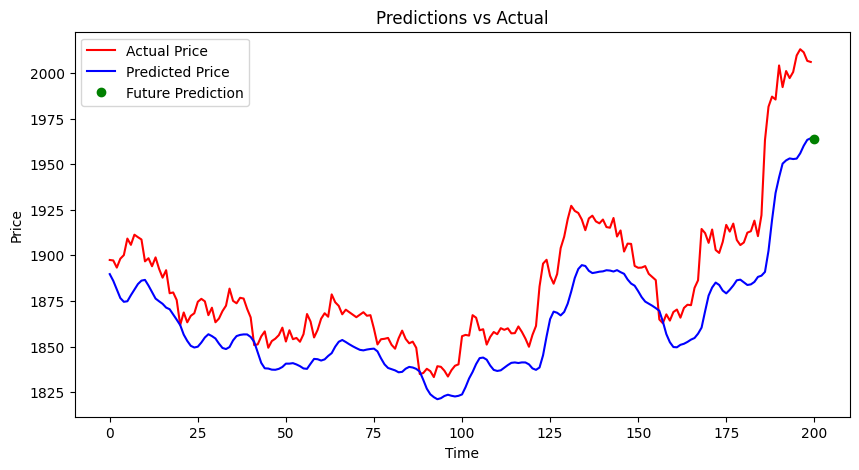

In [12]:
# предсказание на один час вперед 
last_data = test_data[-seq_length:]
last_data = np.reshape(last_data, (1, seq_length, 1))
prediction_1h = model.predict(last_data)
prediction_1h = scaler.inverse_transform(prediction_1h)

plt.figure(figsize=(10,5))
plt.title('Predictions vs Actual')
plt.plot(y_test, color='red', label='Actual Price')
plt.plot(predictions, color='blue', label='Predicted Price')
plt.plot(len(y_test), prediction_1h, 'go', label='Future Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [37]:
prediction_1h

array([[1906.0734]], dtype=float32)

1/1 [==============================] - 0s 38ms/step


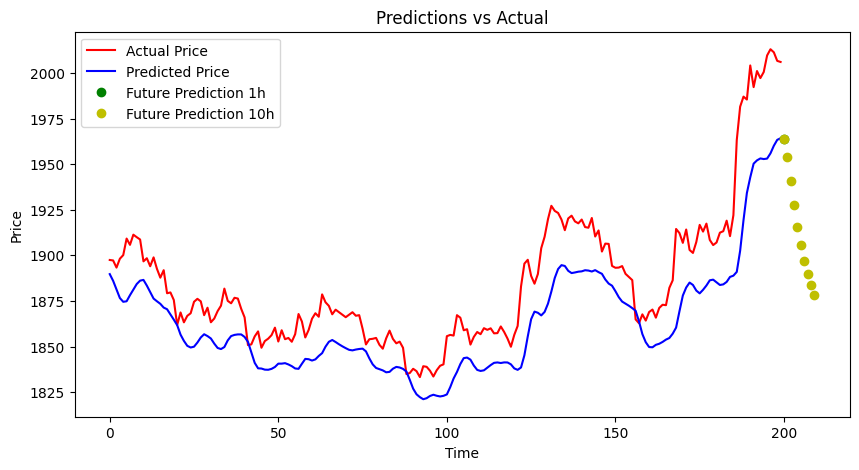

In [13]:
# предсказание на 10 часов
plt.figure(figsize=(10,5))
plt.title('Predictions vs Actual')
plt.plot(y_test, color='red', label='Actual Price')
plt.plot(predictions, color='blue', label='Predicted Price')
plt.plot(len(y_test), prediction_1h, 'go', label='Future Prediction 1h')

last_data = test_data[-seq_length:] # 50 seq_len
last_data = np.reshape(last_data, (1, seq_length, 1))
prediction_10h = []
for i in range(10):
    pred = model.predict(last_data)
    prediction_10h.append(pred[0][0])
    last_data = np.append(last_data[:,1:,:], [[pred[0]]], axis=1)
prediction_10h = scaler.inverse_transform([prediction_10h])

x_10h = range(len(y_test), len(y_test) + 10)
plt.plot(x_10h, prediction_10h[0], 'yo', label='Future Prediction 10h')

plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
